In [46]:
import os
import sys
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from torch.utils.data import Dataset, DataLoader

### Network architecture

In [53]:
class Model(nn.Module):
  def __init__(self, window):
    super().__init__()
    self.CNNModel= nn.Sequential(
        nn.Conv1d(in_channels=window, out_channels=32, kernel_size=1, padding="same"),
        nn.Tanh(),
        nn.MaxPool1d(kernel_size=1, padding=0),
        nn.ReLU()
    )
    self.LSTMModel= nn.Sequential(
        nn.LSTM(input_size=1, hidden_size=64, batch_first=True)
    )
    self.LinearModel= nn.Sequential(
        nn.Tanh(),
        nn.Linear(in_features=64, out_features=1)
    )

  def forward(self, data):
    out1= self.CNNModel(data)
    out2, _= self.LSTMModel(out1)
    out3= self.LinearModel(out2[:, -1, :])
    out4= torch.reshape(out3, (len(out2), ))
    return out4

### Dataset

In [17]:
directory = './historical'
filenames = os.listdir(directory)
print(filenames)

all_data = np.zeros((len(filenames),1816),dtype = np.float32)
for i in range(len(filenames)):
    filename = filenames[i]
    print(i)
    print(filename)
    
    data = pd.read_csv(directory+'/'+filename)
    vars = ['Price']
    data = data[vars]
    data = np.array(data)
    data = np.transpose(data)
    data = data[0]
    data = data[::-1]
    
    all_data[i] = data

    print(all_data.shape)  
    np.save('crypto', all_data)

['BNB Historical Data.csv', 'Ethereum Historical Data.csv', 'Cardano Historical Data.csv', 'USDC Historical Data.csv', 'Dogecoin Historical Data.csv', 'Tether USDt Historical Data.csv', 'XRP Historical Data.csv', 'Bitcoin Historical Data.csv', 'TRON Historical Data.csv', 'Solana Historical Data.csv']
0
BNB Historical Data.csv
(10, 1816)
1
Ethereum Historical Data.csv
(10, 1816)
2
Cardano Historical Data.csv
(10, 1816)
3
USDC Historical Data.csv
(10, 1816)
4
Dogecoin Historical Data.csv
(10, 1816)
5
Tether USDt Historical Data.csv
(10, 1816)
6
XRP Historical Data.csv
(10, 1816)
7
Bitcoin Historical Data.csv
(10, 1816)
8
TRON Historical Data.csv
(10, 1816)
9
Solana Historical Data.csv
(10, 1816)


In [37]:
# Each array represents .
# For more details, refer to the attached csv files 

prices = np.load('./crypto.npy')

print(prices.shape)
print(prices[0:2])

(10, 1816)
[[  13.7    13.03   13.65 ...  687.39  665.43  667.77]
 [ 130.75  127.19  134.27 ... 3627.88 3418.84 3349.53]]


In [32]:
class CustomDataset(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        self.length = len(X_data)

    def __getitem__(self, index):
        x = self.X_data[index]
        y = self.y_data[index]
        return x, y

    def __len__(self):
        return self.length

In [33]:
def sliding_windows(sequence, window):
    x,y=[],[]
    
    for i in range(window, len(sequence)):
        x.append(sequence[i-window:i])
        y.append(sequence[i])

    return torch.reshape((torch.tensor(x)).to(torch.float32), (len(x), window, 1)), (torch.tensor(y)).to(torch.float32)

In [38]:
device= "cuda:0" if torch.cuda.is_available() else "cpu"
print(device)

train_size = int(len(prices[0])*0.8)
print(train_size)

cuda:0
1452


### Training with lookback = 5

Epoch: 1/200, Train Loss: 0.7194, Test Loss: 1.2217
Epoch: 2/200, Train Loss: 0.6850, Test Loss: 1.2981
Epoch: 3/200, Train Loss: 0.6679, Test Loss: 1.3240
Epoch: 4/200, Train Loss: 0.6476, Test Loss: 1.3190
Epoch: 5/200, Train Loss: 0.6209, Test Loss: 1.2796
Epoch: 6/200, Train Loss: 0.5724, Test Loss: 1.1614
Epoch: 7/200, Train Loss: 0.5318, Test Loss: 1.0453
Epoch: 8/200, Train Loss: 0.3082, Test Loss: 1.0884
Epoch: 9/200, Train Loss: 0.2999, Test Loss: 1.1038
Epoch: 10/200, Train Loss: 0.3961, Test Loss: 1.0536
Epoch: 11/200, Train Loss: 0.2505, Test Loss: 1.0435
Epoch: 12/200, Train Loss: 0.2017, Test Loss: 1.1086
Epoch: 13/200, Train Loss: 0.2569, Test Loss: 1.0369
Epoch: 14/200, Train Loss: 0.2973, Test Loss: 1.0363
Epoch: 15/200, Train Loss: 0.3886, Test Loss: 1.0382
Epoch: 16/200, Train Loss: 0.2401, Test Loss: 1.0209
Epoch: 17/200, Train Loss: 0.2364, Test Loss: 1.0301
Epoch: 18/200, Train Loss: 0.2704, Test Loss: 1.0348
Epoch: 19/200, Train Loss: 0.3498, Test Loss: 1.0240
Ep

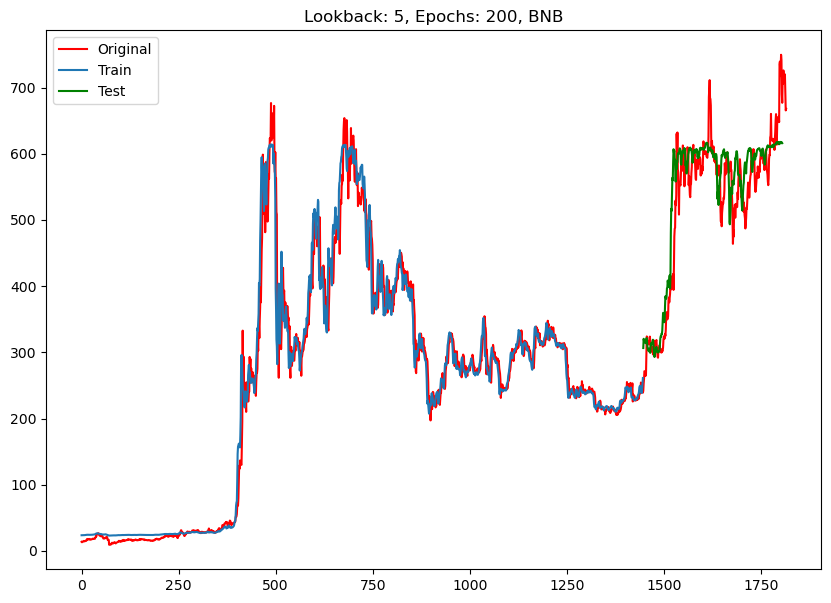

MAE Loss: 23.143524169921875
R-squared: 0.9096724987030029
RMSE: 33.504399708167995
Epoch: 1/200, Train Loss: 0.7767, Test Loss: 1.0522
Epoch: 2/200, Train Loss: 0.7523, Test Loss: 1.0946
Epoch: 3/200, Train Loss: 0.7387, Test Loss: 1.0917
Epoch: 4/200, Train Loss: 0.7214, Test Loss: 1.0508
Epoch: 5/200, Train Loss: 0.6771, Test Loss: 0.8765
Epoch: 6/200, Train Loss: 0.5777, Test Loss: 0.5499
Epoch: 7/200, Train Loss: 0.4714, Test Loss: 0.3643
Epoch: 8/200, Train Loss: 0.4086, Test Loss: 0.5223
Epoch: 9/200, Train Loss: 0.5352, Test Loss: 0.5736
Epoch: 10/200, Train Loss: 0.4596, Test Loss: 0.3627
Epoch: 11/200, Train Loss: 0.3622, Test Loss: 0.2531
Epoch: 12/200, Train Loss: 0.3111, Test Loss: 0.2412
Epoch: 13/200, Train Loss: 0.2910, Test Loss: 0.2197
Epoch: 14/200, Train Loss: 0.2598, Test Loss: 0.2214
Epoch: 15/200, Train Loss: 0.2277, Test Loss: 0.2077
Epoch: 16/200, Train Loss: 0.1466, Test Loss: 0.1779
Epoch: 17/200, Train Loss: 0.0986, Test Loss: 0.1338
Epoch: 18/200, Train Los

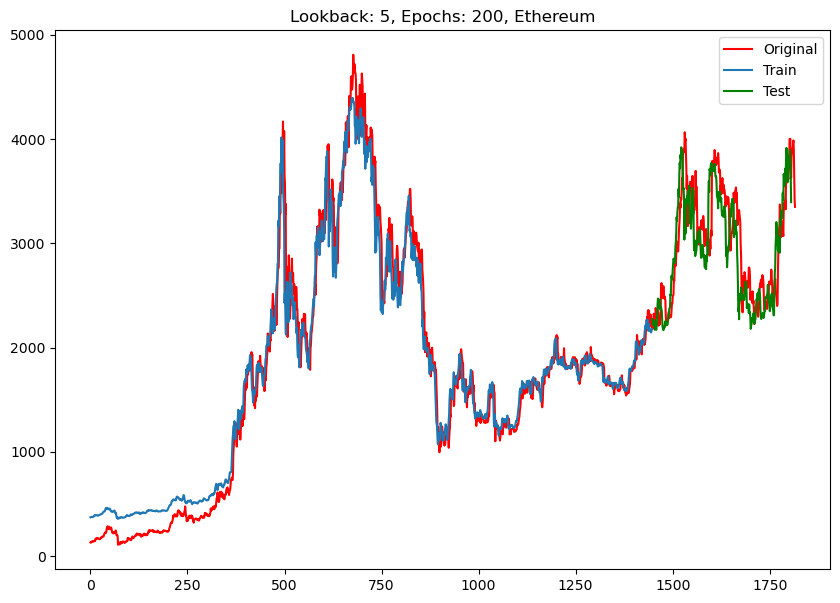

MAE Loss: 131.09915161132812
R-squared: 0.9042485952377319
RMSE: 159.56884657374383
Epoch: 1/200, Train Loss: 0.8685, Test Loss: 0.3259
Epoch: 2/200, Train Loss: 0.8321, Test Loss: 0.2911
Epoch: 3/200, Train Loss: 0.8193, Test Loss: 0.2767
Epoch: 4/200, Train Loss: 0.7924, Test Loss: 0.2703
Epoch: 5/200, Train Loss: 0.7695, Test Loss: 0.2710
Epoch: 6/200, Train Loss: 0.7381, Test Loss: 0.2603
Epoch: 7/200, Train Loss: 0.6873, Test Loss: 0.2302
Epoch: 8/200, Train Loss: 0.6314, Test Loss: 0.1869
Epoch: 9/200, Train Loss: 0.5857, Test Loss: 0.1376
Epoch: 10/200, Train Loss: 0.5360, Test Loss: 0.1793
Epoch: 11/200, Train Loss: 0.4316, Test Loss: 0.1325
Epoch: 12/200, Train Loss: 0.3241, Test Loss: 0.2705
Epoch: 13/200, Train Loss: 0.2256, Test Loss: 0.1080
Epoch: 14/200, Train Loss: 0.2764, Test Loss: 0.1755
Epoch: 15/200, Train Loss: 0.2112, Test Loss: 0.1020
Epoch: 16/200, Train Loss: 0.2589, Test Loss: 0.1696
Epoch: 17/200, Train Loss: 0.2066, Test Loss: 0.0702
Epoch: 18/200, Train Los

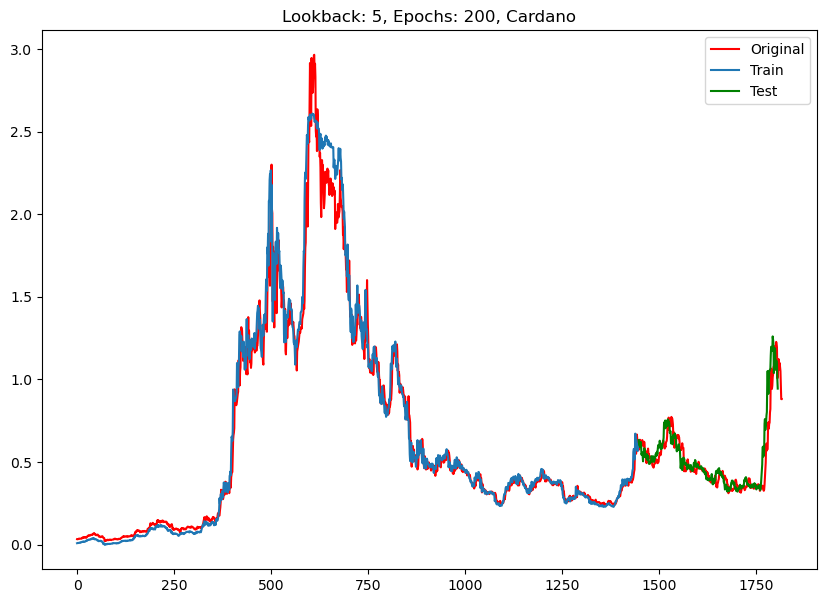

MAE Loss: 0.021825658157467842
R-squared: 0.9744035005569458
RMSE: 0.03225092617149373
Epoch: 1/200, Train Loss: 0.4489, Test Loss: 0.3656
Epoch: 2/200, Train Loss: 0.4415, Test Loss: 0.3646
Epoch: 3/200, Train Loss: 0.4413, Test Loss: 0.3649
Epoch: 4/200, Train Loss: 0.4407, Test Loss: 0.3647
Epoch: 5/200, Train Loss: 0.4403, Test Loss: 0.3645
Epoch: 6/200, Train Loss: 0.4396, Test Loss: 0.3638
Epoch: 7/200, Train Loss: 0.4384, Test Loss: 0.3621
Epoch: 8/200, Train Loss: 0.4352, Test Loss: 0.3571
Epoch: 9/200, Train Loss: 0.4244, Test Loss: 0.3307
Epoch: 10/200, Train Loss: 0.3650, Test Loss: 0.2593
Epoch: 11/200, Train Loss: 0.3305, Test Loss: 0.2548
Epoch: 12/200, Train Loss: 0.3132, Test Loss: 0.2515
Epoch: 13/200, Train Loss: 0.2938, Test Loss: 0.2494
Epoch: 14/200, Train Loss: 0.2876, Test Loss: 0.2467
Epoch: 15/200, Train Loss: 0.2812, Test Loss: 0.2481
Epoch: 16/200, Train Loss: 0.2810, Test Loss: 0.2416
Epoch: 17/200, Train Loss: 0.2762, Test Loss: 0.2444
Epoch: 18/200, Train 

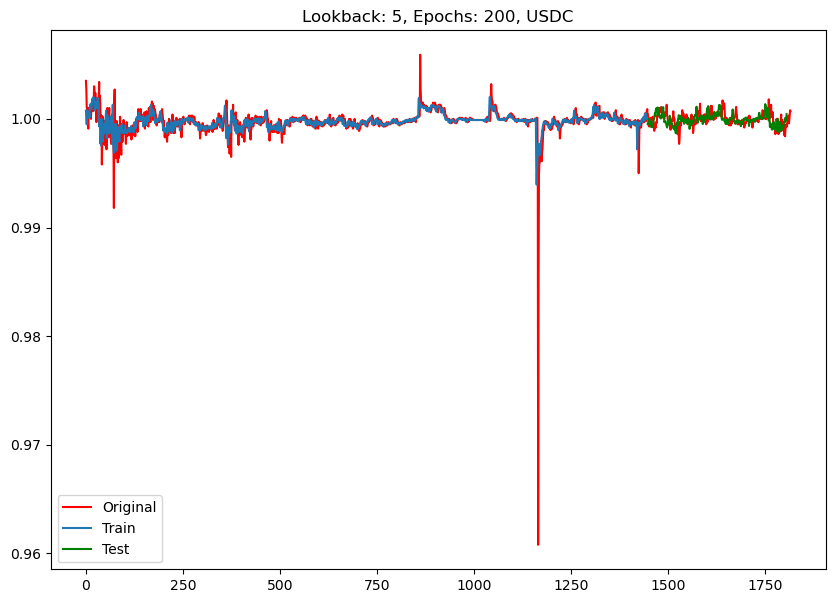

MAE Loss: 0.00027798378141596913
R-squared: 0.5852124691009521
RMSE: 0.00037781881248189424
Epoch: 1/200, Train Loss: 0.7139, Test Loss: 0.8564
Epoch: 2/200, Train Loss: 0.6738, Test Loss: 0.9395
Epoch: 3/200, Train Loss: 0.6631, Test Loss: 0.9755
Epoch: 4/200, Train Loss: 0.6494, Test Loss: 0.9741
Epoch: 5/200, Train Loss: 0.6445, Test Loss: 0.9576
Epoch: 6/200, Train Loss: 0.6323, Test Loss: 0.8962
Epoch: 7/200, Train Loss: 0.6177, Test Loss: 0.7810
Epoch: 8/200, Train Loss: 0.5829, Test Loss: 0.5134
Epoch: 9/200, Train Loss: 0.4409, Test Loss: 0.3530
Epoch: 10/200, Train Loss: 0.3423, Test Loss: 0.6138
Epoch: 11/200, Train Loss: 0.4295, Test Loss: 0.6538
Epoch: 12/200, Train Loss: 0.4093, Test Loss: 0.6390
Epoch: 13/200, Train Loss: 0.4066, Test Loss: 0.6170
Epoch: 14/200, Train Loss: 0.3802, Test Loss: 0.5698
Epoch: 15/200, Train Loss: 0.3536, Test Loss: 0.5177
Epoch: 16/200, Train Loss: 0.3270, Test Loss: 0.4622
Epoch: 17/200, Train Loss: 0.3089, Test Loss: 0.4162
Epoch: 18/200, T

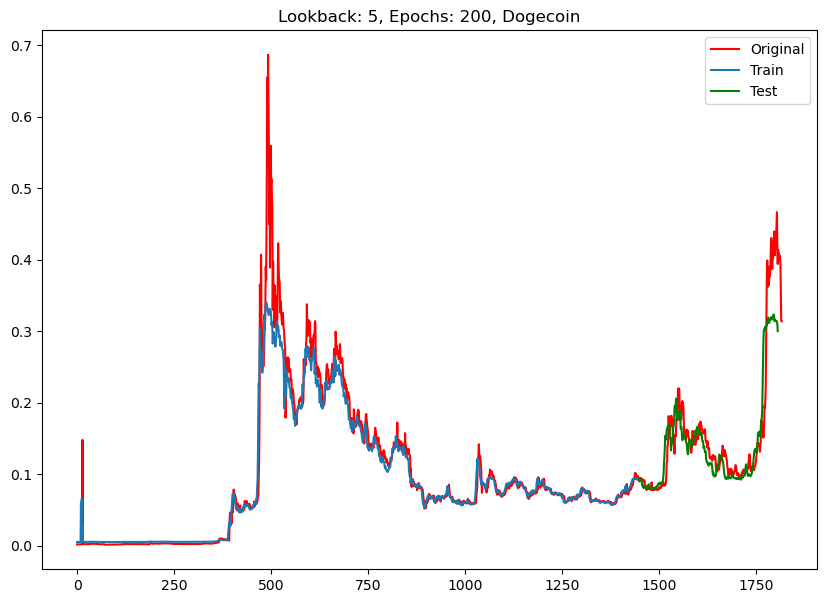

MAE Loss: 0.01750689186155796
R-squared: 0.8680302500724792
RMSE: 0.03350671823513211
Epoch: 1/200, Train Loss: 0.5992, Test Loss: 0.4612
Epoch: 2/200, Train Loss: 0.5466, Test Loss: 0.4053
Epoch: 3/200, Train Loss: 0.5448, Test Loss: 0.3995
Epoch: 4/200, Train Loss: 0.5340, Test Loss: 0.3827
Epoch: 5/200, Train Loss: 0.5165, Test Loss: 0.3562
Epoch: 6/200, Train Loss: 0.4523, Test Loss: 0.3551
Epoch: 7/200, Train Loss: 0.4391, Test Loss: 0.3480
Epoch: 8/200, Train Loss: 0.4097, Test Loss: 0.3613
Epoch: 9/200, Train Loss: 0.4230, Test Loss: 0.3434
Epoch: 10/200, Train Loss: 0.3996, Test Loss: 0.3524
Epoch: 11/200, Train Loss: 0.4285, Test Loss: 0.3317
Epoch: 12/200, Train Loss: 0.4002, Test Loss: 0.3373
Epoch: 13/200, Train Loss: 0.3916, Test Loss: 0.3335
Epoch: 14/200, Train Loss: 0.3744, Test Loss: 0.3330
Epoch: 15/200, Train Loss: 0.3818, Test Loss: 0.3303
Epoch: 16/200, Train Loss: 0.3663, Test Loss: 0.3280
Epoch: 17/200, Train Loss: 0.3882, Test Loss: 0.3166
Epoch: 18/200, Train L

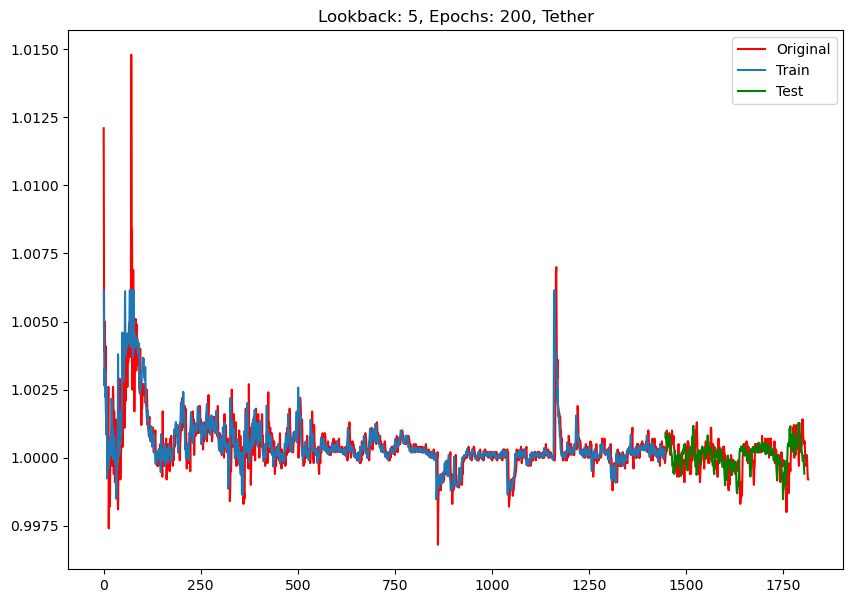

MAE Loss: 0.00027172197587788105
R-squared: 0.5237522125244141
RMSE: 0.00035763466351729754
Epoch: 1/200, Train Loss: 0.6645, Test Loss: 0.8076
Epoch: 2/200, Train Loss: 0.6394, Test Loss: 0.8258
Epoch: 3/200, Train Loss: 0.6219, Test Loss: 0.8312
Epoch: 4/200, Train Loss: 0.5983, Test Loss: 0.8196
Epoch: 5/200, Train Loss: 0.5650, Test Loss: 0.7821
Epoch: 6/200, Train Loss: 0.5108, Test Loss: 0.6903
Epoch: 7/200, Train Loss: 0.3859, Test Loss: 0.6603
Epoch: 8/200, Train Loss: 0.1712, Test Loss: 0.6941
Epoch: 9/200, Train Loss: 0.3356, Test Loss: 0.5668
Epoch: 10/200, Train Loss: 0.3239, Test Loss: 0.6925
Epoch: 11/200, Train Loss: 0.3309, Test Loss: 0.5095
Epoch: 12/200, Train Loss: 0.2203, Test Loss: 0.6008
Epoch: 13/200, Train Loss: 0.3505, Test Loss: 0.6398
Epoch: 14/200, Train Loss: 0.2488, Test Loss: 0.4405
Epoch: 15/200, Train Loss: 0.2069, Test Loss: 0.4192
Epoch: 16/200, Train Loss: 0.1838, Test Loss: 0.4741
Epoch: 17/200, Train Loss: 0.2176, Test Loss: 0.5049
Epoch: 18/200, T

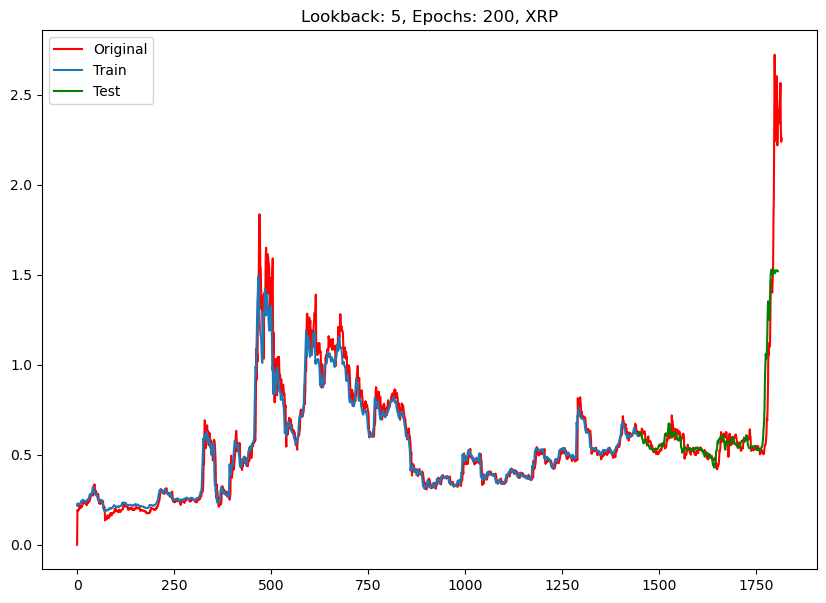

MAE Loss: 0.07564802467823029
R-squared: 0.7626343369483948
RMSE: 0.2215210603341928
Epoch: 1/200, Train Loss: 0.6805, Test Loss: 1.5700
Epoch: 2/200, Train Loss: 0.6533, Test Loss: 1.6528
Epoch: 3/200, Train Loss: 0.6321, Test Loss: 1.7339
Epoch: 4/200, Train Loss: 0.6121, Test Loss: 1.7373
Epoch: 5/200, Train Loss: 0.5444, Test Loss: 1.7075
Epoch: 6/200, Train Loss: 0.4128, Test Loss: 1.4824
Epoch: 7/200, Train Loss: 0.2988, Test Loss: 1.4586
Epoch: 8/200, Train Loss: 0.2998, Test Loss: 1.4560
Epoch: 9/200, Train Loss: 0.2854, Test Loss: 1.3459
Epoch: 10/200, Train Loss: 0.2763, Test Loss: 1.1757
Epoch: 11/200, Train Loss: 0.2770, Test Loss: 1.1753
Epoch: 12/200, Train Loss: 0.2572, Test Loss: 1.1057
Epoch: 13/200, Train Loss: 0.2299, Test Loss: 1.1379
Epoch: 14/200, Train Loss: 0.2398, Test Loss: 1.0549
Epoch: 15/200, Train Loss: 0.2267, Test Loss: 1.0342
Epoch: 16/200, Train Loss: 0.2165, Test Loss: 1.0023
Epoch: 17/200, Train Loss: 0.2218, Test Loss: 1.0641
Epoch: 18/200, Train Lo

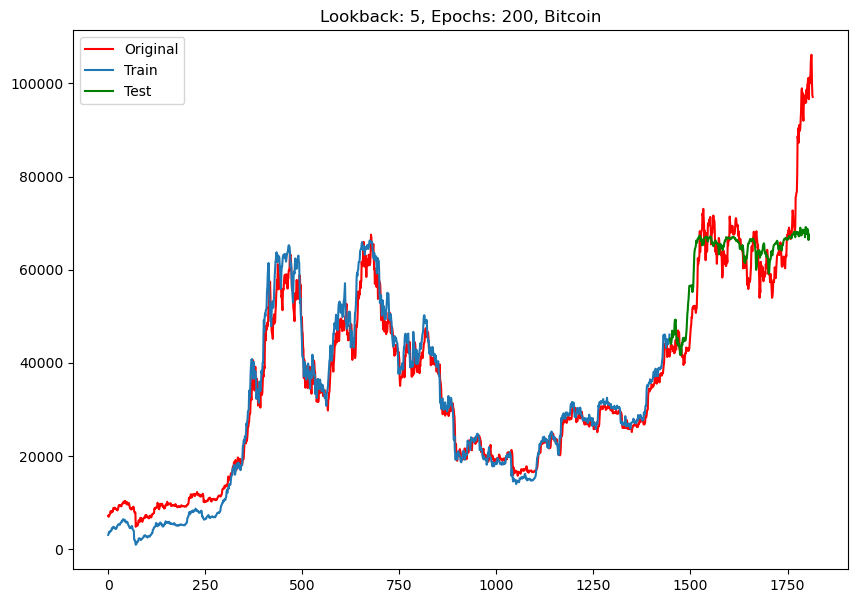

MAE Loss: 5583.93310546875
R-squared: 0.4780092239379883
RMSE: 10140.334511247644
Epoch: 1/200, Train Loss: 0.5271, Test Loss: 1.8093
Epoch: 2/200, Train Loss: 0.4988, Test Loss: 1.8228
Epoch: 3/200, Train Loss: 0.4899, Test Loss: 1.8123
Epoch: 4/200, Train Loss: 0.4806, Test Loss: 1.7883
Epoch: 5/200, Train Loss: 0.4590, Test Loss: 1.7168
Epoch: 6/200, Train Loss: 0.4130, Test Loss: 1.5831
Epoch: 7/200, Train Loss: 0.2885, Test Loss: 1.5078
Epoch: 8/200, Train Loss: 0.1318, Test Loss: 1.4263
Epoch: 9/200, Train Loss: 0.1460, Test Loss: 1.4217
Epoch: 10/200, Train Loss: 0.1769, Test Loss: 1.4157
Epoch: 11/200, Train Loss: 0.2584, Test Loss: 1.2777
Epoch: 12/200, Train Loss: 0.1653, Test Loss: 1.2472
Epoch: 13/200, Train Loss: 0.1226, Test Loss: 1.3352
Epoch: 14/200, Train Loss: 0.1557, Test Loss: 1.2107
Epoch: 15/200, Train Loss: 0.1389, Test Loss: 1.1983
Epoch: 16/200, Train Loss: 0.1378, Test Loss: 1.1682
Epoch: 17/200, Train Loss: 0.1349, Test Loss: 1.1245
Epoch: 18/200, Train Loss:

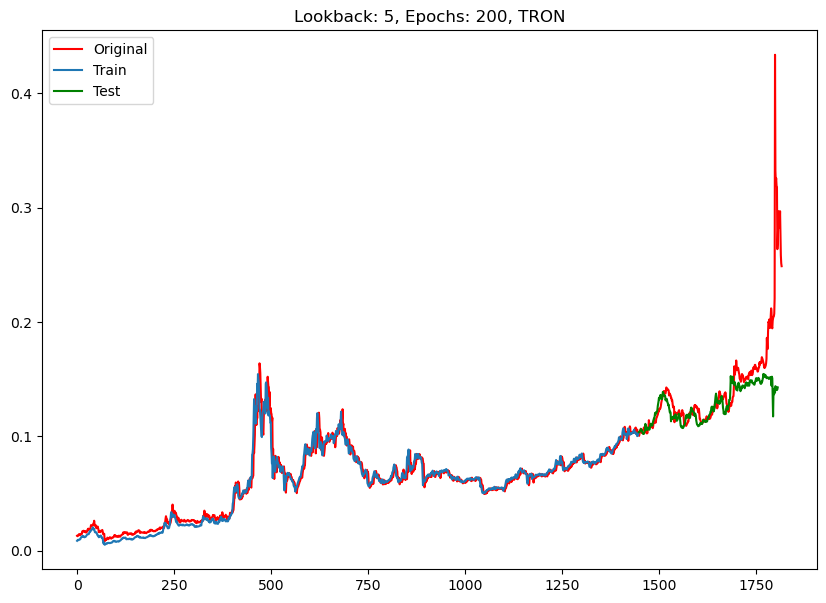

MAE Loss: 0.015505158342421055
R-squared: 0.20789474248886108
RMSE: 0.03857339031199058
Epoch: 1/200, Train Loss: 0.6381, Test Loss: 1.7420
Epoch: 2/200, Train Loss: 0.5754, Test Loss: 1.8097
Epoch: 3/200, Train Loss: 0.5319, Test Loss: 1.8683
Epoch: 4/200, Train Loss: 0.5352, Test Loss: 1.8802
Epoch: 5/200, Train Loss: 0.5204, Test Loss: 1.8690
Epoch: 6/200, Train Loss: 0.5127, Test Loss: 1.8569
Epoch: 7/200, Train Loss: 0.5043, Test Loss: 1.8305
Epoch: 8/200, Train Loss: 0.4910, Test Loss: 1.7597
Epoch: 9/200, Train Loss: 0.4603, Test Loss: 1.6027
Epoch: 10/200, Train Loss: 0.3487, Test Loss: 1.1928
Epoch: 11/200, Train Loss: 0.3130, Test Loss: 1.0622
Epoch: 12/200, Train Loss: 0.2533, Test Loss: 0.9408
Epoch: 13/200, Train Loss: 0.2912, Test Loss: 0.4233
Epoch: 14/200, Train Loss: 0.1793, Test Loss: 0.5640
Epoch: 15/200, Train Loss: 0.1681, Test Loss: 0.3210
Epoch: 16/200, Train Loss: 0.1303, Test Loss: 0.5804
Epoch: 17/200, Train Loss: 0.1404, Test Loss: 0.3286
Epoch: 18/200, Train

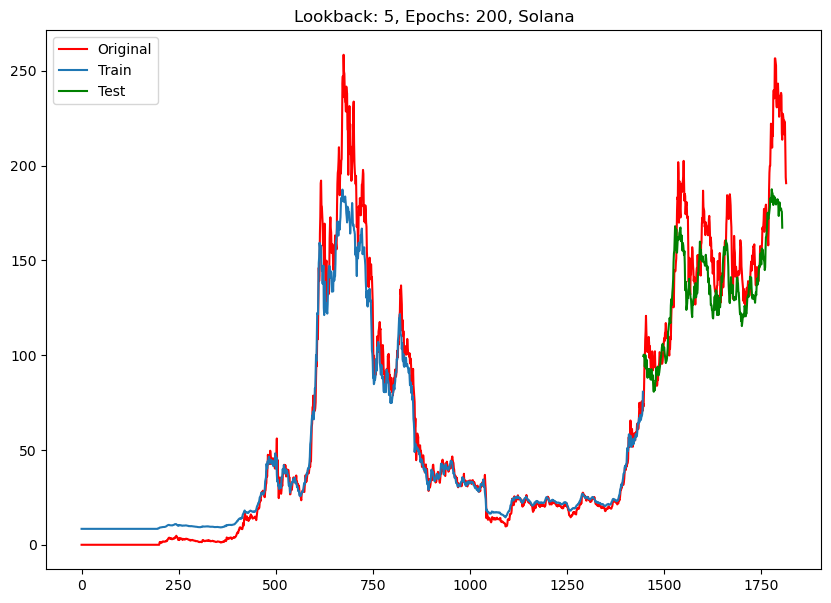

MAE Loss: 18.65083885192871
R-squared: 0.6062982082366943
RMSE: 23.49040123529848


In [61]:
lookback = 5

for i in range(len(prices)):
    crypto_name = filenames[i].split()[0]
    seq = prices[i]
    mean, std = np.mean(seq), np.std(seq)
    seq = (seq - mean)/std

    X_train, y_train = sliding_windows(seq[:train_size], lookback)
    X_test, y_test = sliding_windows(seq[train_size:], lookback)

    train_data = CustomDataset(X_train, y_train)
    test_data = CustomDataset(X_test, y_test)
    batch_size = 64
    train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

    num_epoch = 200
    model = Model(lookback)
    model = model.to(device)
    optim = torch.optim.Adam(model.parameters())
    loss = torch.nn.L1Loss()

    for epoch in range(num_epoch):
        model.train()
        train_loss = 0
        for i, (X, y) in enumerate(train_loader):
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X)
            lossv = loss(y_pred, y)
            train_loss += lossv

            optim.zero_grad()
            lossv.backward()
            optim.step()

        train_loss /= len(train_loader)

        model.eval()
        test_loss = 0
        with torch.inference_mode():
            for X, y in test_loader:
                X = X.to(device)
                y = y.to(device)
                y_pred = model(X)
                lossw = loss(y_pred, y)
                test_loss += lossw

            test_loss /= len(test_loader)

        print(f"Epoch: {epoch+1}/{num_epoch}, Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

    model.eval()
    with torch.no_grad():
        train_outputs = []
        for X, _ in train_loader:
            X = X.to(device)
            y_pred = model(X)
            train_outputs.append(y_pred.cpu().numpy())

        train_outputs = np.concatenate(train_outputs)

    test_outputs = []
    with torch.no_grad():
        for X, _ in test_loader:
            X = X.to(device)
            y_pred = model(X)
            test_outputs.append(y_pred.cpu().numpy())

    test_outputs = np.concatenate(test_outputs)

    #multiplying back the mean and standard deviation, essentially undoing the normalization before plotting
    plt.figure(figsize=(10, 7))
    plt.plot(range(len(seq)), seq * std + mean, label="Original", c="r")
    plt.plot(range(len(train_outputs)), train_outputs * std + mean, label="Train")
    plt.plot(range(len(train_outputs), len(train_outputs) + len(test_outputs)), test_outputs * std + mean, label="Test", c="g")
    plt.title(f"Lookback: {lookback}, Epochs: {num_epoch}, {crypto_name}")
    plt.legend()
    plt.show()

    y_test2 = y_test * std + mean
    test_outputs2 = test_outputs * std + mean
    y_test_np = y_test2.detach().numpy()
    l1_loss = torch.nn.L1Loss()(torch.from_numpy(test_outputs2), y_test2).item()
    r_squared = r2_score(y_test_np, test_outputs2)
    rmse = np.sqrt(mean_squared_error(y_test_np, test_outputs2))
    
    print(f"MAE Loss: {l1_loss}")
    print(f"R-squared: {r_squared}")
    print(f"RMSE: {rmse}")

### Training with lookback = 10

Epoch: 1/200, Train Loss: 0.6837, Test Loss: 1.3605
Epoch: 2/200, Train Loss: 0.6659, Test Loss: 1.3779
Epoch: 3/200, Train Loss: 0.6551, Test Loss: 1.3835
Epoch: 4/200, Train Loss: 0.6365, Test Loss: 1.3716
Epoch: 5/200, Train Loss: 0.6021, Test Loss: 1.3103
Epoch: 6/200, Train Loss: 0.5104, Test Loss: 1.8282
Epoch: 7/200, Train Loss: 0.4344, Test Loss: 1.0535
Epoch: 8/200, Train Loss: 0.3331, Test Loss: 0.3324
Epoch: 9/200, Train Loss: 0.2526, Test Loss: 0.9293
Epoch: 10/200, Train Loss: 0.2615, Test Loss: 0.5285
Epoch: 11/200, Train Loss: 0.1725, Test Loss: 0.4828
Epoch: 12/200, Train Loss: 0.1268, Test Loss: 0.3080
Epoch: 13/200, Train Loss: 0.1582, Test Loss: 0.9702
Epoch: 14/200, Train Loss: 0.2565, Test Loss: 0.4722
Epoch: 15/200, Train Loss: 0.1535, Test Loss: 0.7446
Epoch: 16/200, Train Loss: 0.2311, Test Loss: 0.2951
Epoch: 17/200, Train Loss: 0.2408, Test Loss: 0.6049
Epoch: 18/200, Train Loss: 0.3204, Test Loss: 0.2409
Epoch: 19/200, Train Loss: 0.1779, Test Loss: 0.5460
Ep

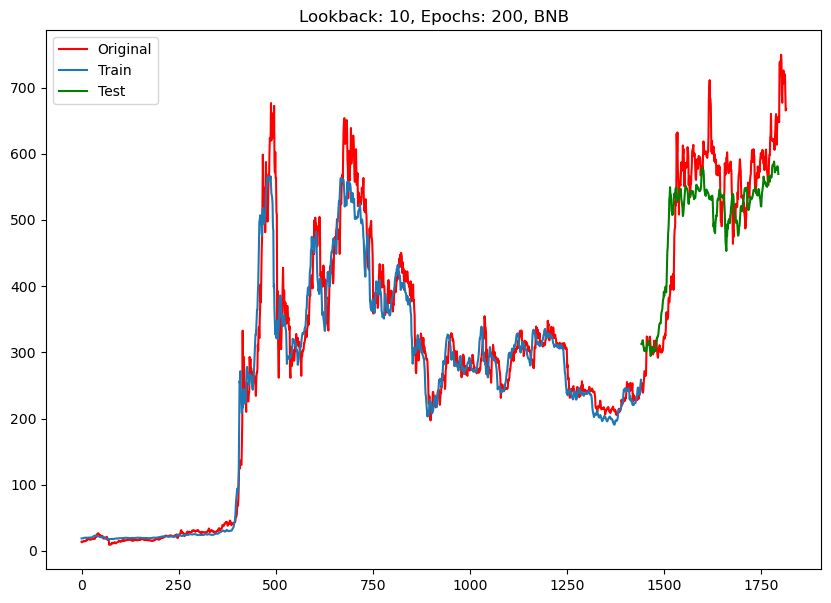

MAE Loss: 45.23194885253906
R-squared: 0.7395878434181213
RMSE: 55.68424908089472
Epoch: 1/200, Train Loss: 0.7591, Test Loss: 1.1071
Epoch: 2/200, Train Loss: 0.7409, Test Loss: 1.1210
Epoch: 3/200, Train Loss: 0.7350, Test Loss: 1.1202
Epoch: 4/200, Train Loss: 0.7274, Test Loss: 1.1088
Epoch: 5/200, Train Loss: 0.7085, Test Loss: 1.0793
Epoch: 6/200, Train Loss: 0.5981, Test Loss: 0.9461
Epoch: 7/200, Train Loss: 0.5994, Test Loss: 0.9118
Epoch: 8/200, Train Loss: 0.4755, Test Loss: 0.7966
Epoch: 9/200, Train Loss: 0.4502, Test Loss: 0.7143
Epoch: 10/200, Train Loss: 0.3492, Test Loss: 0.7614
Epoch: 11/200, Train Loss: 0.4290, Test Loss: 0.7053
Epoch: 12/200, Train Loss: 0.3512, Test Loss: 0.6050
Epoch: 13/200, Train Loss: 0.3070, Test Loss: 0.5834
Epoch: 14/200, Train Loss: 0.3402, Test Loss: 0.5191
Epoch: 15/200, Train Loss: 0.3583, Test Loss: 0.4463
Epoch: 16/200, Train Loss: 0.2770, Test Loss: 0.4295
Epoch: 17/200, Train Loss: 0.3148, Test Loss: 0.3861
Epoch: 18/200, Train Loss:

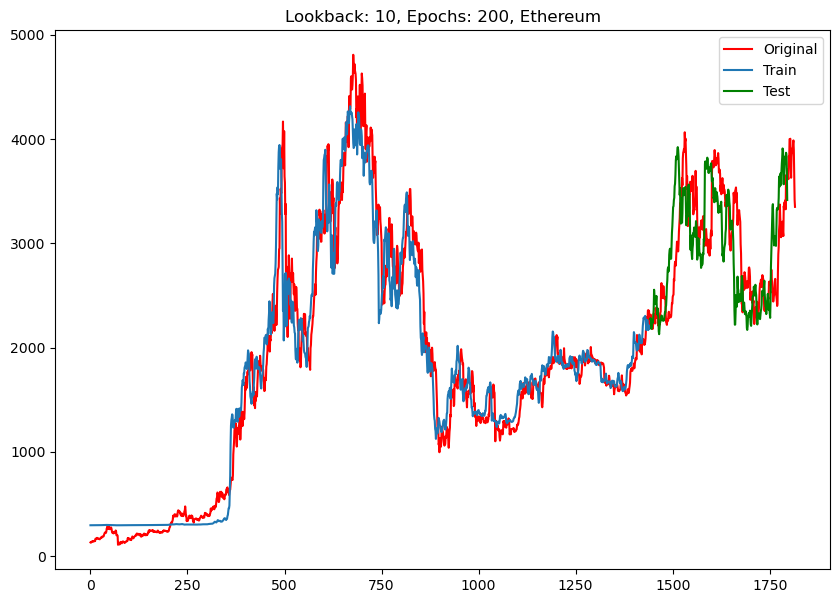

MAE Loss: 118.62666320800781
R-squared: 0.9144172072410583
RMSE: 149.85536646838844
Epoch: 1/200, Train Loss: 0.8139, Test Loss: 0.2976
Epoch: 2/200, Train Loss: 0.7861, Test Loss: 0.2886
Epoch: 3/200, Train Loss: 0.7719, Test Loss: 0.2909
Epoch: 4/200, Train Loss: 0.7508, Test Loss: 0.2931
Epoch: 5/200, Train Loss: 0.7263, Test Loss: 0.2850
Epoch: 6/200, Train Loss: 0.6806, Test Loss: 0.2535
Epoch: 7/200, Train Loss: 0.5970, Test Loss: 0.1462
Epoch: 8/200, Train Loss: 0.3976, Test Loss: 0.1223
Epoch: 9/200, Train Loss: 0.3963, Test Loss: 0.1447
Epoch: 10/200, Train Loss: 0.3278, Test Loss: 0.1299
Epoch: 11/200, Train Loss: 0.3115, Test Loss: 0.1160
Epoch: 12/200, Train Loss: 0.2779, Test Loss: 0.0996
Epoch: 13/200, Train Loss: 0.2791, Test Loss: 0.1961
Epoch: 14/200, Train Loss: 0.2431, Test Loss: 0.0952
Epoch: 15/200, Train Loss: 0.2558, Test Loss: 0.1473
Epoch: 16/200, Train Loss: 0.1698, Test Loss: 0.0855
Epoch: 17/200, Train Loss: 0.2039, Test Loss: 0.2581
Epoch: 18/200, Train Los

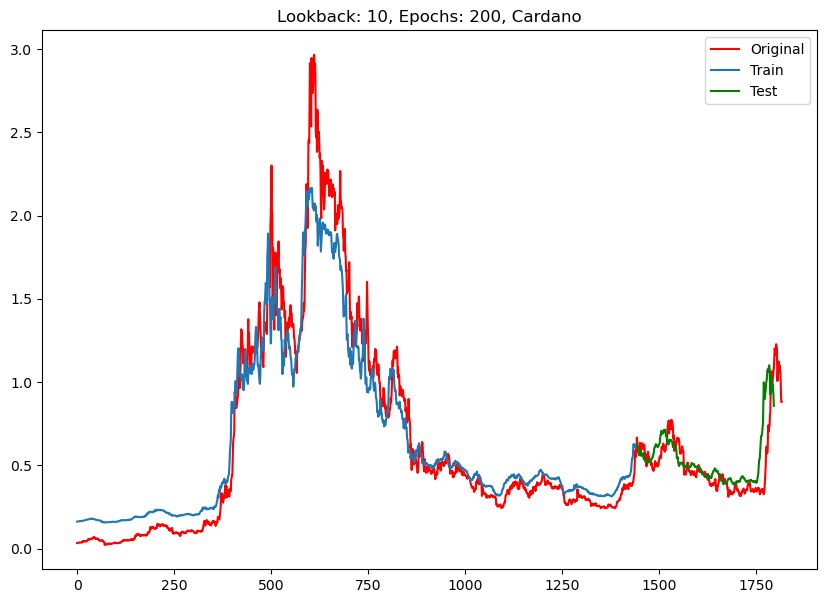

MAE Loss: 0.04980447143316269
R-squared: 0.9136339426040649
RMSE: 0.05957372061563881
Epoch: 1/200, Train Loss: 0.4460, Test Loss: 0.3725
Epoch: 2/200, Train Loss: 0.4395, Test Loss: 0.3678
Epoch: 3/200, Train Loss: 0.4399, Test Loss: 0.3669
Epoch: 4/200, Train Loss: 0.4372, Test Loss: 0.3623
Epoch: 5/200, Train Loss: 0.4309, Test Loss: 0.3467
Epoch: 6/200, Train Loss: 0.4059, Test Loss: 0.3275
Epoch: 7/200, Train Loss: 0.3826, Test Loss: 0.3285
Epoch: 8/200, Train Loss: 0.3662, Test Loss: 0.3144
Epoch: 9/200, Train Loss: 0.3485, Test Loss: 0.2997
Epoch: 10/200, Train Loss: 0.3514, Test Loss: 0.3025
Epoch: 11/200, Train Loss: 0.3442, Test Loss: 0.3008
Epoch: 12/200, Train Loss: 0.3404, Test Loss: 0.2921
Epoch: 13/200, Train Loss: 0.3287, Test Loss: 0.2816
Epoch: 14/200, Train Loss: 0.3217, Test Loss: 0.2538
Epoch: 15/200, Train Loss: 0.2932, Test Loss: 0.2473
Epoch: 16/200, Train Loss: 0.2961, Test Loss: 0.2479
Epoch: 17/200, Train Loss: 0.3005, Test Loss: 0.2501
Epoch: 18/200, Train L

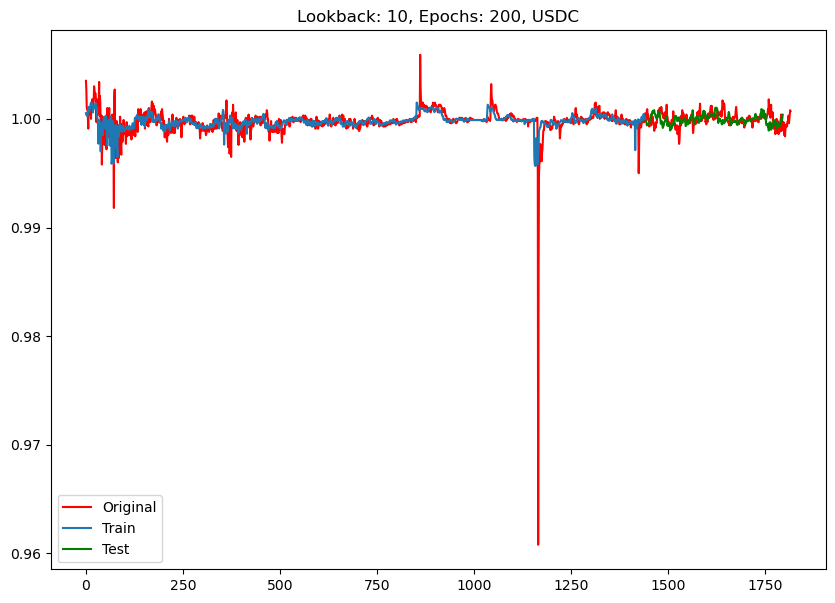

MAE Loss: 0.0002786768018268049
R-squared: 0.5821433663368225
RMSE: 0.0003813486354086241
Epoch: 1/200, Train Loss: 0.7010, Test Loss: 0.9181
Epoch: 2/200, Train Loss: 0.6658, Test Loss: 0.9967
Epoch: 3/200, Train Loss: 0.6496, Test Loss: 1.0099
Epoch: 4/200, Train Loss: 0.6269, Test Loss: 1.0001
Epoch: 5/200, Train Loss: 0.6125, Test Loss: 0.9655
Epoch: 6/200, Train Loss: 0.5855, Test Loss: 0.8969
Epoch: 7/200, Train Loss: 0.5483, Test Loss: 0.8090
Epoch: 8/200, Train Loss: 0.5160, Test Loss: 0.7495
Epoch: 9/200, Train Loss: 0.3679, Test Loss: 0.7346
Epoch: 10/200, Train Loss: 0.3574, Test Loss: 0.7452
Epoch: 11/200, Train Loss: 0.4089, Test Loss: 0.6489
Epoch: 12/200, Train Loss: 0.3324, Test Loss: 0.6593
Epoch: 13/200, Train Loss: 0.3548, Test Loss: 0.6597
Epoch: 14/200, Train Loss: 0.3153, Test Loss: 0.6311
Epoch: 15/200, Train Loss: 0.3228, Test Loss: 0.6195
Epoch: 16/200, Train Loss: 0.2994, Test Loss: 0.6176
Epoch: 17/200, Train Loss: 0.3255, Test Loss: 0.6080
Epoch: 18/200, Tra

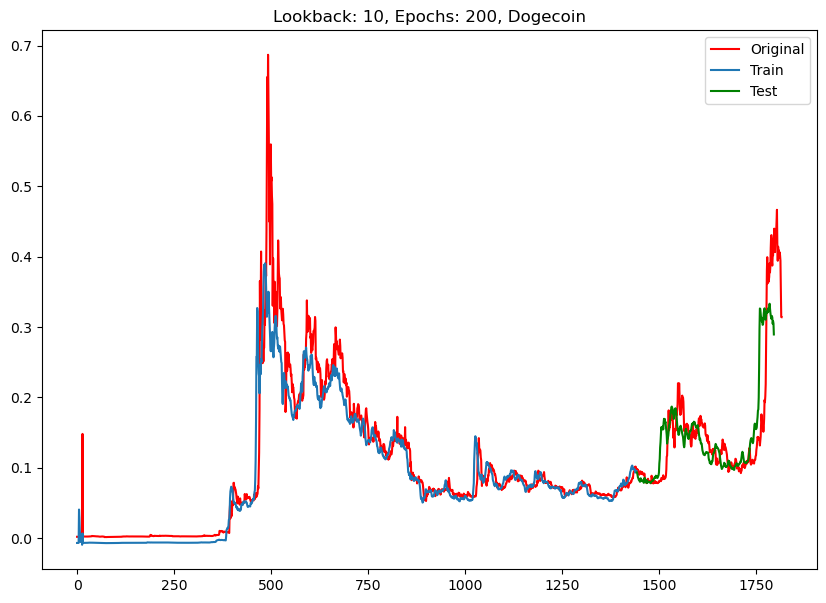

MAE Loss: 0.01597229205071926
R-squared: 0.8726562857627869
RMSE: 0.03302418828798449
Epoch: 1/200, Train Loss: 0.6056, Test Loss: 0.4801
Epoch: 2/200, Train Loss: 0.5478, Test Loss: 0.4136
Epoch: 3/200, Train Loss: 0.5491, Test Loss: 0.4112
Epoch: 4/200, Train Loss: 0.5481, Test Loss: 0.4134
Epoch: 5/200, Train Loss: 0.5452, Test Loss: 0.4121
Epoch: 6/200, Train Loss: 0.5430, Test Loss: 0.4103
Epoch: 7/200, Train Loss: 0.5371, Test Loss: 0.4006
Epoch: 8/200, Train Loss: 0.5229, Test Loss: 0.3643
Epoch: 9/200, Train Loss: 0.4810, Test Loss: 0.3530
Epoch: 10/200, Train Loss: 0.4291, Test Loss: 0.3625
Epoch: 11/200, Train Loss: 0.4218, Test Loss: 0.3474
Epoch: 12/200, Train Loss: 0.3919, Test Loss: 0.3431
Epoch: 13/200, Train Loss: 0.3936, Test Loss: 0.3435
Epoch: 14/200, Train Loss: 0.3692, Test Loss: 0.3327
Epoch: 15/200, Train Loss: 0.3550, Test Loss: 0.3266
Epoch: 16/200, Train Loss: 0.3571, Test Loss: 0.3285
Epoch: 17/200, Train Loss: 0.3562, Test Loss: 0.3212
Epoch: 18/200, Train L

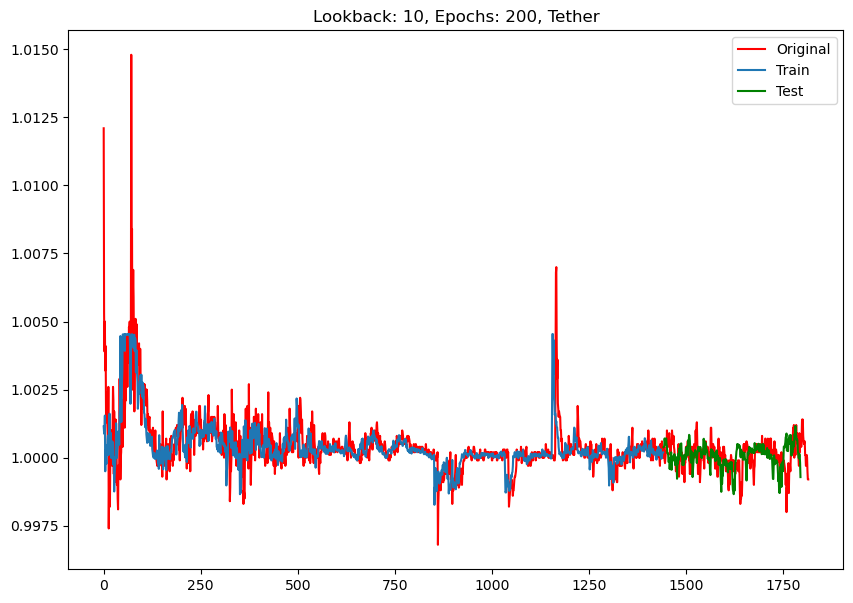

MAE Loss: 0.00027202986530028284
R-squared: 0.5177591443061829
RMSE: 0.00035992405775970014
Epoch: 1/200, Train Loss: 0.6691, Test Loss: 0.8766
Epoch: 2/200, Train Loss: 0.6509, Test Loss: 0.8955
Epoch: 3/200, Train Loss: 0.6381, Test Loss: 0.9084
Epoch: 4/200, Train Loss: 0.6101, Test Loss: 0.9075
Epoch: 5/200, Train Loss: 0.4813, Test Loss: 0.6677
Epoch: 6/200, Train Loss: 0.3841, Test Loss: 0.7738
Epoch: 7/200, Train Loss: 0.4327, Test Loss: 0.7067
Epoch: 8/200, Train Loss: 0.3271, Test Loss: 0.6392
Epoch: 9/200, Train Loss: 0.2702, Test Loss: 0.7093
Epoch: 10/200, Train Loss: 0.2889, Test Loss: 0.5677
Epoch: 11/200, Train Loss: 0.2417, Test Loss: 0.6088
Epoch: 12/200, Train Loss: 0.2365, Test Loss: 0.7195
Epoch: 13/200, Train Loss: 0.3751, Test Loss: 0.6283
Epoch: 14/200, Train Loss: 0.2644, Test Loss: 0.5568
Epoch: 15/200, Train Loss: 0.2176, Test Loss: 0.5427
Epoch: 16/200, Train Loss: 0.2096, Test Loss: 0.4504
Epoch: 17/200, Train Loss: 0.1491, Test Loss: 0.5536
Epoch: 18/200, T

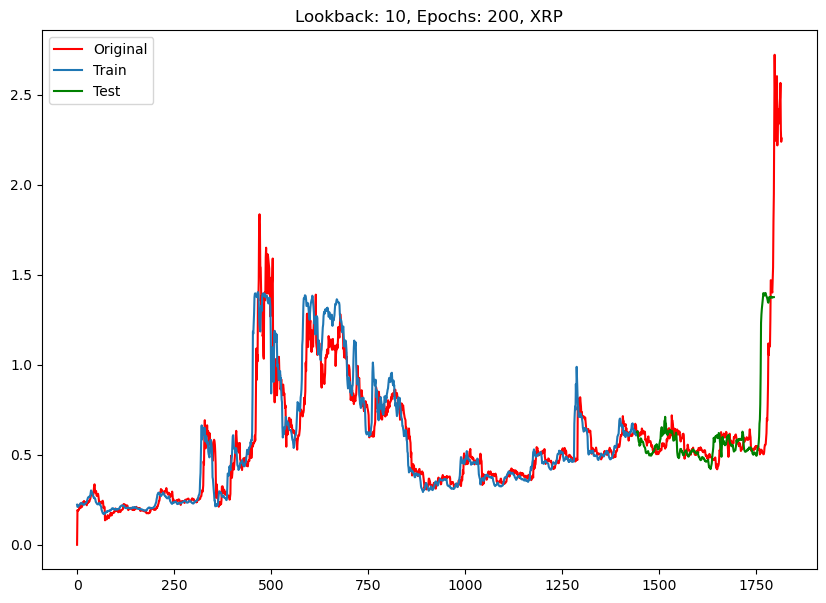

MAE Loss: 0.08035643398761749
R-squared: 0.694648265838623
RMSE: 0.25297987745574146
Epoch: 1/200, Train Loss: 0.6750, Test Loss: 1.6270
Epoch: 2/200, Train Loss: 0.6349, Test Loss: 1.7318
Epoch: 3/200, Train Loss: 0.5964, Test Loss: 1.8129
Epoch: 4/200, Train Loss: 0.5550, Test Loss: 1.8045
Epoch: 5/200, Train Loss: 0.4959, Test Loss: 1.7209
Epoch: 6/200, Train Loss: 0.4140, Test Loss: 1.5494
Epoch: 7/200, Train Loss: 0.3592, Test Loss: 1.4794
Epoch: 8/200, Train Loss: 0.3191, Test Loss: 1.4115
Epoch: 9/200, Train Loss: 0.3537, Test Loss: 1.3462
Epoch: 10/200, Train Loss: 0.3323, Test Loss: 1.3771
Epoch: 11/200, Train Loss: 0.3008, Test Loss: 1.1550
Epoch: 12/200, Train Loss: 0.2435, Test Loss: 1.2457
Epoch: 13/200, Train Loss: 0.2439, Test Loss: 1.1704
Epoch: 14/200, Train Loss: 0.2454, Test Loss: 1.1563
Epoch: 15/200, Train Loss: 0.2299, Test Loss: 1.1616
Epoch: 16/200, Train Loss: 0.2255, Test Loss: 1.1587
Epoch: 17/200, Train Loss: 0.2197, Test Loss: 1.1603
Epoch: 18/200, Train Lo

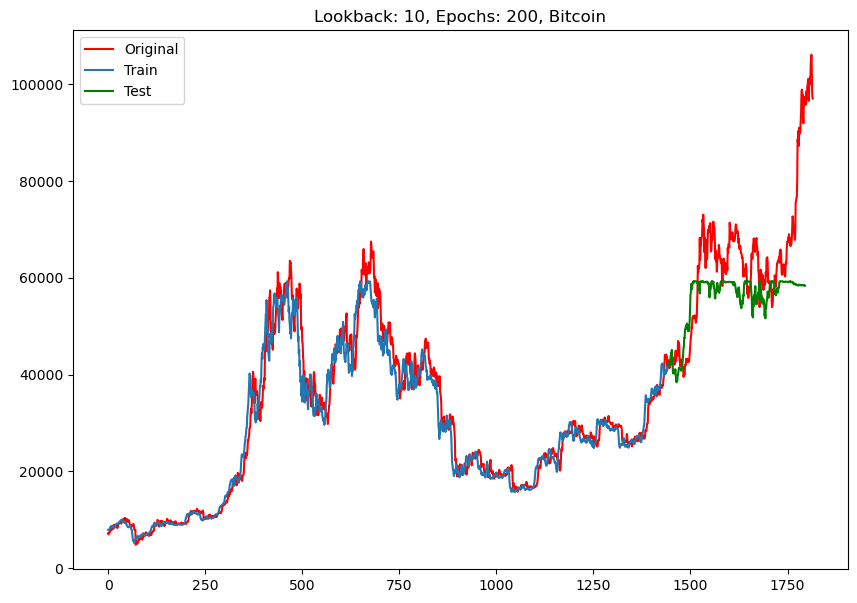

MAE Loss: 9395.794921875
R-squared: -0.06421804428100586
RMSE: 14321.851835569309
Epoch: 1/200, Train Loss: 0.5933, Test Loss: 1.7332
Epoch: 2/200, Train Loss: 0.5089, Test Loss: 1.8332
Epoch: 3/200, Train Loss: 0.4628, Test Loss: 1.7927
Epoch: 4/200, Train Loss: 0.4273, Test Loss: 1.7302
Epoch: 5/200, Train Loss: 0.3811, Test Loss: 1.6494
Epoch: 6/200, Train Loss: 0.2909, Test Loss: 1.6240
Epoch: 7/200, Train Loss: 0.3235, Test Loss: 1.5629
Epoch: 8/200, Train Loss: 0.2556, Test Loss: 1.4504
Epoch: 9/200, Train Loss: 0.1906, Test Loss: 1.5214
Epoch: 10/200, Train Loss: 0.2355, Test Loss: 1.5481
Epoch: 11/200, Train Loss: 0.2478, Test Loss: 1.4939
Epoch: 12/200, Train Loss: 0.1894, Test Loss: 1.5042
Epoch: 13/200, Train Loss: 0.1744, Test Loss: 1.5429
Epoch: 14/200, Train Loss: 0.2375, Test Loss: 1.4814
Epoch: 15/200, Train Loss: 0.1790, Test Loss: 1.4774
Epoch: 16/200, Train Loss: 0.1679, Test Loss: 1.5191
Epoch: 17/200, Train Loss: 0.2207, Test Loss: 1.4446
Epoch: 18/200, Train Loss:

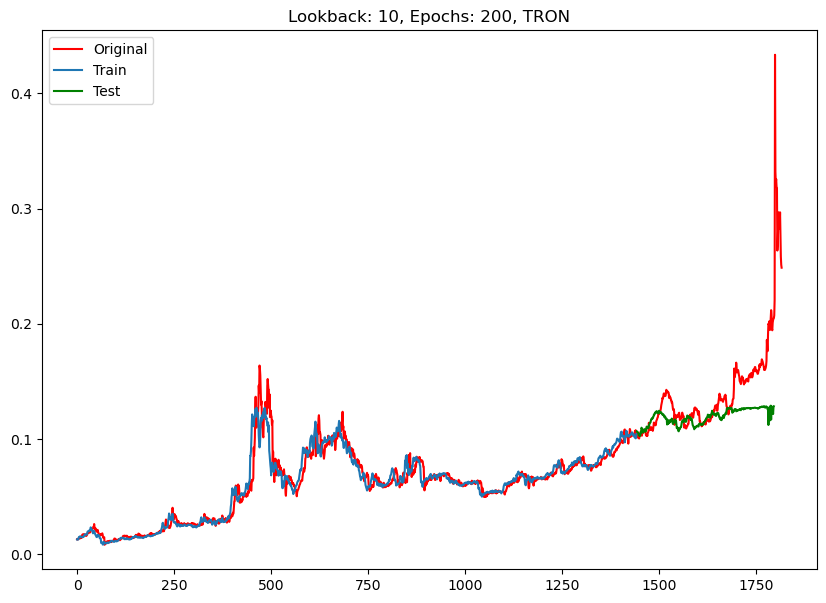

MAE Loss: 0.02491140365600586
R-squared: -0.16829264163970947
RMSE: 0.04692818932009692
Epoch: 1/200, Train Loss: 0.6780, Test Loss: 1.6973
Epoch: 2/200, Train Loss: 0.5741, Test Loss: 1.7752
Epoch: 3/200, Train Loss: 0.4971, Test Loss: 1.8311
Epoch: 4/200, Train Loss: 0.4821, Test Loss: 1.8076
Epoch: 5/200, Train Loss: 0.4414, Test Loss: 1.7682
Epoch: 6/200, Train Loss: 0.4158, Test Loss: 1.7034
Epoch: 7/200, Train Loss: 0.3881, Test Loss: 1.6438
Epoch: 8/200, Train Loss: 0.3559, Test Loss: 1.5594
Epoch: 9/200, Train Loss: 0.3127, Test Loss: 1.5157
Epoch: 10/200, Train Loss: 0.3010, Test Loss: 1.4565
Epoch: 11/200, Train Loss: 0.3344, Test Loss: 1.4038
Epoch: 12/200, Train Loss: 0.2951, Test Loss: 1.2851
Epoch: 13/200, Train Loss: 0.2519, Test Loss: 1.1279
Epoch: 14/200, Train Loss: 0.2191, Test Loss: 1.1280
Epoch: 15/200, Train Loss: 0.2337, Test Loss: 1.1110
Epoch: 16/200, Train Loss: 0.2357, Test Loss: 1.1294
Epoch: 17/200, Train Loss: 0.3107, Test Loss: 0.5006
Epoch: 18/200, Train

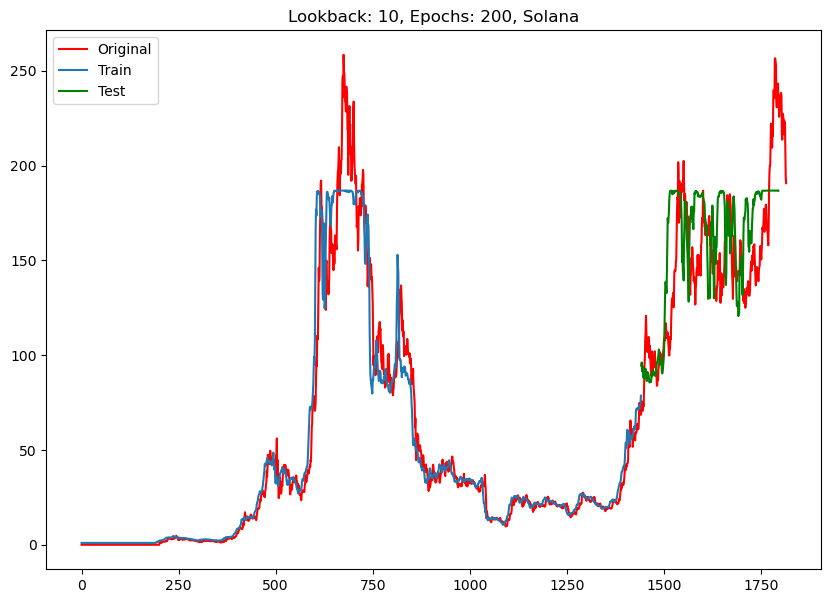

MAE Loss: 18.247650146484375
R-squared: 0.6272575855255127
RMSE: 22.729595717574366


In [62]:
lookback = 10

for i in range(len(prices)):
    crypto_name = filenames[i].split()[0]
    seq = prices[i]
    mean, std = np.mean(seq), np.std(seq)
    seq = (seq - mean)/std

    X_train, y_train = sliding_windows(seq[:train_size], lookback)
    X_test, y_test = sliding_windows(seq[train_size:], lookback)

    train_data = CustomDataset(X_train, y_train)
    test_data = CustomDataset(X_test, y_test)
    batch_size = 64
    train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

    num_epoch = 200
    model = Model(lookback)
    model = model.to(device)
    optim = torch.optim.Adam(model.parameters())
    loss = torch.nn.L1Loss()

    for epoch in range(num_epoch):
        model.train()
        train_loss = 0
        for i, (X, y) in enumerate(train_loader):
            X = X.to(device)
            y = y.to(device)
            y_pred = model(X)
            lossv = loss(y_pred, y)
            train_loss += lossv

            optim.zero_grad()
            lossv.backward()
            optim.step()

        train_loss /= len(train_loader)

        model.eval()
        test_loss = 0
        with torch.inference_mode():
            for X, y in test_loader:
                X = X.to(device)
                y = y.to(device)
                y_pred = model(X)
                lossw = loss(y_pred, y)
                test_loss += lossw

            test_loss /= len(test_loader)

        print(f"Epoch: {epoch+1}/{num_epoch}, Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

    model.eval()
    with torch.no_grad():
        train_outputs = []
        for X, _ in train_loader:
            X = X.to(device)
            y_pred = model(X)
            train_outputs.append(y_pred.cpu().numpy())

        train_outputs = np.concatenate(train_outputs)

    test_outputs = []
    with torch.no_grad():
        for X, _ in test_loader:
            X = X.to(device)
            y_pred = model(X)
            test_outputs.append(y_pred.cpu().numpy())

    test_outputs = np.concatenate(test_outputs)

    #multiplying back the mean and standard deviation, essentially undoing the normalization before plotting
    plt.figure(figsize=(10, 7))
    plt.plot(range(len(seq)), seq * std + mean, label="Original", c="r")
    plt.plot(range(len(train_outputs)), train_outputs * std + mean, label="Train")
    plt.plot(range(len(train_outputs), len(train_outputs) + len(test_outputs)), test_outputs * std + mean, label="Test", c="g")
    plt.title(f"Lookback: {lookback}, Epochs: {num_epoch}, {crypto_name}")
    plt.legend()
    plt.show()

    y_test2 = y_test * std + mean
    test_outputs2 = test_outputs * std + mean
    y_test_np = y_test2.detach().numpy()
    l1_loss = torch.nn.L1Loss()(torch.from_numpy(test_outputs2), y_test2).item()
    r_squared = r2_score(y_test_np, test_outputs2)
    rmse = np.sqrt(mean_squared_error(y_test_np, test_outputs2))
    
    print(f"MAE Loss: {l1_loss}")
    print(f"R-squared: {r_squared}")
    print(f"RMSE: {rmse}")